<a href="https://colab.research.google.com/github/duongcao4791/CMPE-255/blob/master/HW2/DuongCao_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TABULAR DATA - Iris dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

### **Load the dataset**

In [2]:
iris = load_iris()
x=iris.data
y=iris.target
idata = pd.DataFrame(iris.data)
idata.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
idata.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## **PCA**

In [4]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled.mean(axis=0)

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [5]:
covariance_matrix = np.cov(x_scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [6]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
2.9380850501999918
0.9201649041624865
0.14774182104494768
0.02085386217646253


In [7]:
pca = PCA()
pca = pca.fit(x_scaled)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [8]:
pca_df = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4']})

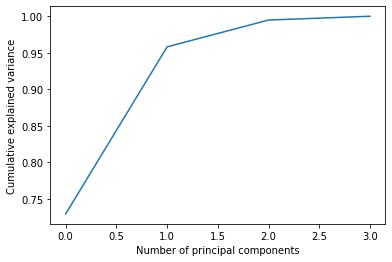

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [10]:
pca_2 = PCA(n_components=2)
pca_2 = pca_2.fit(x_scaled)
x_pca = pca_2.transform(x)

In [11]:
pca_df = pd.DataFrame(x_pca, columns=['X', 'Y'])
pca_df['label'] = iris.target
pca_df.head()

,X,Y,label
0,2.640270,5.204041,0
1,2.670730,4.666910,0
2,2.454606,4.773636,0
3,2.545517,4.648463,0
4,2.561228,5.258629,0


[]

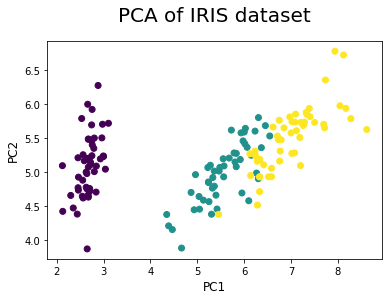

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)
plt.title("PCA of IRIS dataset", fontsize = 20, pad=20)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.plot()

## **SVD**

In [13]:
u, s, v = np.linalg.svd(x, full_matrices=True)

In [14]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained

array([0.965, 0.033, 0.001, 0.   ])

In [15]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=y.tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2
0,0,-0.061617,0.129611
1,0,-0.058071,0.111020
2,0,-0.056763,0.117966
3,0,-0.056653,0.105308
4,0,-0.061230,0.131090


[]

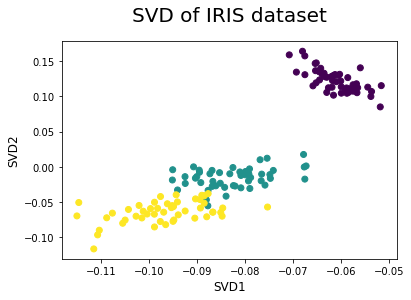

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(svd_df['SV1'],svd_df['SV2'],c=y)
plt.title("SVD of IRIS dataset", fontsize = 20, pad=20)
plt.xlabel("SVD1", fontsize=12)
plt.ylabel("SVD2", fontsize=12)
plt.plot()

In [17]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
x_svd = svd.fit_transform(x)

In [18]:
svd_df1 = pd.DataFrame(x_svd, columns=['X', 'Y'])
svd_df1['label'] = iris.target
svd_df1.head()

,X,Y,label
0,5.912747,2.302033,0
1,5.572482,1.971826,0
2,5.446977,2.095206,0
3,5.436459,1.870382,0
4,5.875645,2.328290,0


[]

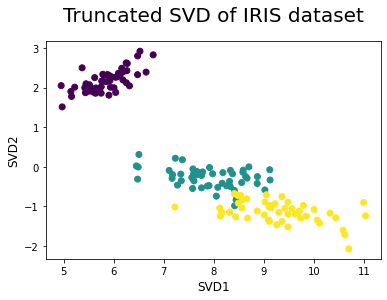

In [19]:
plt.figure(figsize=(6,4))
plt.scatter(x_svd[:,0], x_svd[:,1], c=y)
plt.title("Truncated SVD of IRIS dataset", fontsize=20, pad=20)
plt.xlabel("SVD1", fontsize=12)
plt.ylabel("SVD2", fontsize=12)
plt.plot()

## **LLE**

In [20]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components =2)
x_lle = lle.fit_transform(x)

In [21]:
lle_df = pd.DataFrame(x_lle, columns=['X', 'Y'])
lle_df['label'] = iris.target
lle_df.head()

,X,Y,label
0,0.0,0.0,0
1,0.0,0.0,0
2,0.0,0.0,0
3,0.0,0.0,0
4,0.0,0.0,0


Data distribution not clear

[]

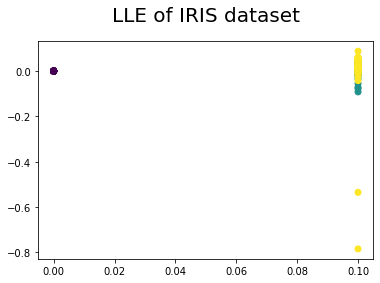

In [22]:
plt.figure(figsize=(6,4))
plt.scatter(x_lle.T[0], x_lle.T[1],c=y)
plt.title("LLE of IRIS dataset", fontsize = 20, pad=20)
plt.plot()

LLE technique not applicable for this data

## **t-SNE**

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=1)
x_tsne = tsne.fit_transform(x)


In [24]:
tsne_df = pd.DataFrame(x_tsne, columns=['X', 'Y'])
tsne_df['label'] = iris.target
tsne_df.head()

,X,Y,label
0,12.392999,-17.884106,0
1,11.630434,-15.228431,0
2,12.736369,-15.459182,0
3,12.386216,-14.974631,0
4,12.245358,-17.894430,0


[]

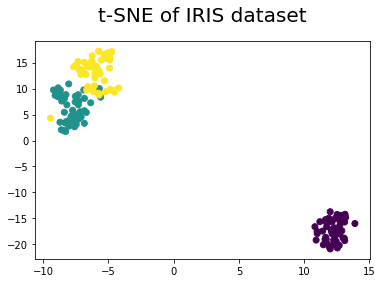

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(x_tsne[:,0], x_tsne[:,1] , c=y)
plt.title("t-SNE of IRIS dataset", fontsize = 20, pad=20)
plt.plot()

## **ISOMAP**

In [26]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2, eigen_solver='auto')
x_isomap=isomap.fit_transform(x)
x_isomap.shape

(150, 2)

In [27]:
isomap_df = pd.DataFrame(x_isomap, columns=['X', 'Y'])
isomap_df['label'] = iris.target
isomap_df.head()

,X,Y,label
0,0.118155,0.381038,0
1,0.113729,0.323243,0
2,0.113922,0.325955,0
3,0.113904,0.325207,0
4,0.117613,0.372992,0


[]

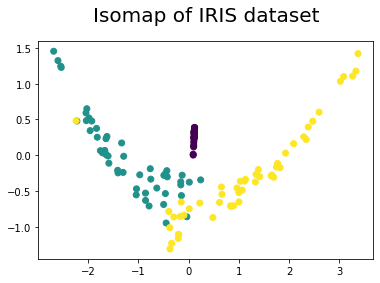

In [28]:
plt.figure(figsize=(6,4))
plt.scatter(x_isomap[:,0], x_isomap[:,1] , c=y)
plt.title("Isomap of IRIS dataset", fontsize = 20, pad=20)
plt.plot()

## **UMAP**

In [29]:
!pip install umap-learn

In [30]:
!pip install "umap-learn[plot]"

In [31]:
import umap
reducer=umap.UMAP()
x_umap=reducer.fit_transform(x)
x_umap.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(150, 2)

In [32]:
col_labels= ['SV'+str(i) for i in range(1,3)]
umap_df = pd.DataFrame(x_umap[:,0:2], index=y.tolist(), columns=col_labels)
umap_df.head()

,SV1,SV2
0,10.778986,10.399211
0,12.449650,8.996552
0,12.281112,9.466735
0,12.367397,9.467359
0,10.370766,10.026931


[]

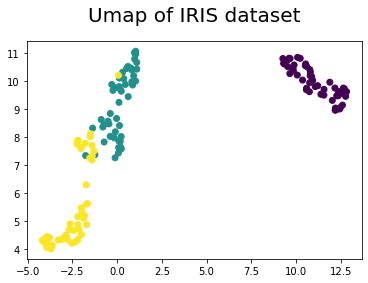

In [33]:
plt.figure(figsize=(6,4))
plt.scatter(x_umap[:,0], x_umap[:,1] , c=y)
plt.title("Umap of IRIS dataset", fontsize = 20, pad=20)
plt.plot()

# **IMAGE DATA - digits dataset**

## **Load Dataset**

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
data=digits.data
target=digits.target
images=digits.images

In [35]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [36]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [37]:
images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

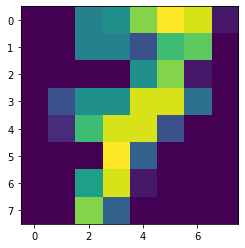

In [38]:
exp = images[7]
plt.imshow(exp, interpolation='none')
plt.show()

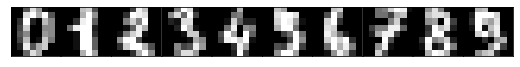

In [39]:
fig, axes = plt.subplots(1,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i],cmap="gray")

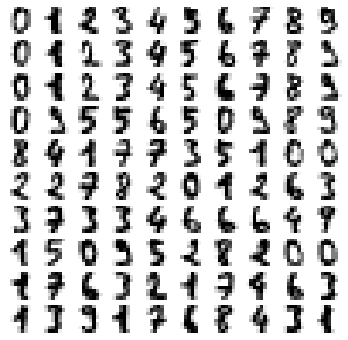

In [40]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(data[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")

## **PCA**

In [41]:
sc = StandardScaler()
scaled_df = sc.fit_transform(data)

In [42]:
covariance_matrix = np.cov(scaled_df.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
7.344776062836362
5.835490537329542
5.1539611764188535
3.9662359665872984
2.9663451950936
2.5720444193206284
2.4060094135782113
2.0686735457465466
1.8299331438269644
1.7895173923196872
1.6978461553340647
1.572878886879526
1.3887078149450514
1.3593360885653953
1.3215253598609051
1.1682917644675292
1.083686775249902
0.999778617144969
0.9743829305689504
0.9089124184577209
0.8227192644558213
0.7763101392595999
0.71155675311714
0.6455236480610015
0.5952739876615555
0.5765017972018521
0.5267315516205454
0.5106363011725055
0.4868638129793723
0.4556010705278522
0.44285155170799345
0.42230086300618525
0.3991063025827595
0.39110111117636887
0.3609451680104025
0.3486030588718664
0.3195963000006773
0.2940662706200296
0.050374440154854934
0.2769228513803107
0.06328961499153322
0.25827300401513303
0.24783028603503526
0.24235660038291465
0.07635394259647406
0.0824681230263774
0.09018543006585249
0.09840876078171423
0.10250433829678986
0.11188654747493114
0.11

In [43]:
i_pca = PCA().fit(scaled_df)
explained_variance = i_pca.explained_variance_ratio_
explained_variance

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

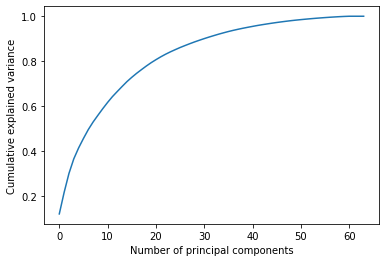

In [44]:
plt.plot(np.cumsum(i_pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [45]:
i_pca2 = PCA(n_components=2)
digits_pca= i_pca2.fit_transform(data)
digits_pca

array([[ -1.25946645,  21.27488325],
       [  7.95761337, -20.76870256],
       [  6.99192182,  -9.95598405],
       ...,
       [ 10.80128338,  -6.96025106],
       [ -4.87209967,  12.42395074],
       [ -0.34439174,   6.36555336]])

[]

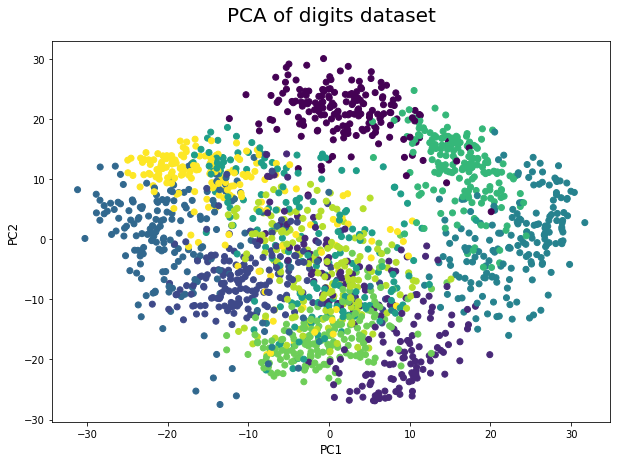

In [46]:
plt.figure(figsize=(10,7))
plt.scatter(digits_pca[:,0], digits_pca[:,1], c=target)
plt.title("PCA of digits dataset", fontsize = 20, pad=20)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.plot()

## **SVD**

In [47]:
Iu, Is, Iv = np.linalg.svd(data,full_matrices=True)

In [48]:
Ivariance_explained = np.round(Is**2/np.sum(Is**2), decimals=3)
Ivariance_explained


array([0.696, 0.047, 0.043, 0.037, 0.026, 0.018, 0.015, 0.013, 0.011,
       0.01 , 0.008, 0.007, 0.006, 0.006, 0.005, 0.004, 0.004, 0.004,
       0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

Text(0, 0.5, 'Percent of the variance explained')

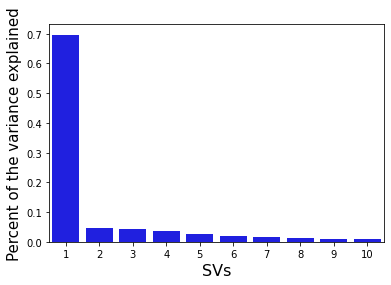

In [49]:
sns.barplot(x=list(range(1,len(Ivariance_explained[:10])+1)),
            y=Ivariance_explained[:10], color="blue")

plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [50]:
Icol_labels= ['SV'+str(i) for i in range(1,3)]
Isvd_df = pd.DataFrame(Iu[:,0:2], index=target.tolist(), columns=Icol_labels)
Isvd_df=Isvd_df.reset_index()
Isvd_df.rename(columns={'index':'Class'}, inplace=True)
Isvd_df.head()

,Class,SV1,SV2
0,0,0.020911,-0.002103
1,1,0.025320,0.013866
2,2,0.025456,0.012195
3,3,0.020581,-0.028023
4,4,0.018577,0.041213


[]

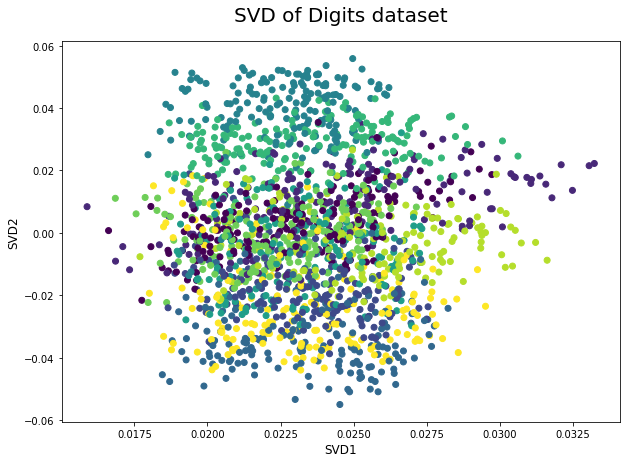

In [51]:
plt.figure(figsize=(10,7))
plt.scatter(Isvd_df['SV1'],Isvd_df['SV2'],c=Isvd_df['Class'])
plt.title("SVD of Digits dataset", fontsize = 20, pad=20)
plt.xlabel("SVD1", fontsize=12)
plt.ylabel("SVD2", fontsize=12)
plt.plot()

### **TruncantedSVD**

[]

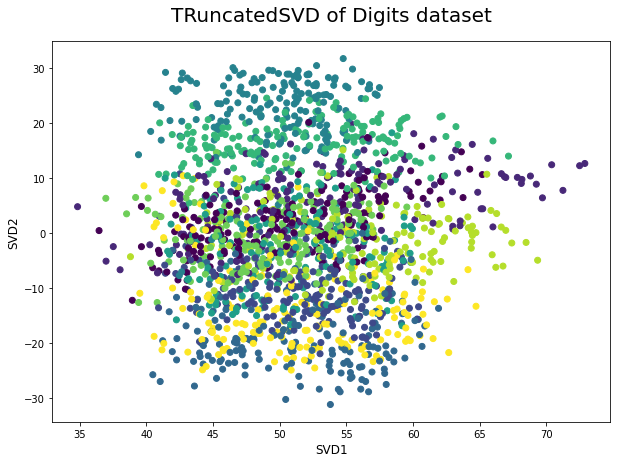

In [52]:
Itrun_svd =  TruncatedSVD(n_components = 2)
Itrun = Itrun_svd.fit_transform(data)
plt.figure(figsize=(10,7))
plt.scatter(Itrun[:,0],Itrun[:,1],c=target)
plt.title("TRuncatedSVD of Digits dataset", fontsize = 20, pad=20)
plt.xlabel("SVD1", fontsize=12)
plt.ylabel("SVD2", fontsize=12)
plt.plot()

## **LLE**

In [53]:
Ille = LocallyLinearEmbedding(n_components = 2)
trans_lle = Ille.fit_transform(data)
trans_lle.shape

(1797, 2)

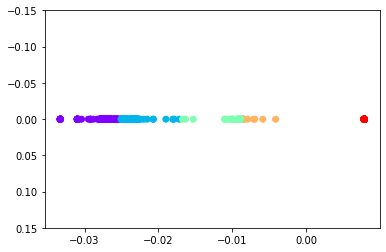

In [54]:
fig, ax = plt.subplots()
colorize = dict(c=trans_lle[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
ax.scatter(trans_lle[:, 0], trans_lle[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

## **t-SNE**

In [55]:
Itsne = TSNE(n_components=2).fit_transform(data)

Text(0.5, 1.0, 't-SNE of Digits dataset')

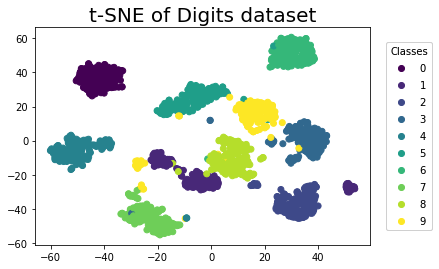

In [56]:
fig, ax = plt.subplots()
scatter = ax.scatter(Itsne[:,0],Itsne[:,1], c=target)
legend1 = ax.legend(*scatter.legend_elements(),loc="right", title="Classes", bbox_to_anchor=(1.2,0.5))
ax.add_artist(legend1)
plt.title('t-SNE of Digits dataset', fontsize=20)

## **ISOMAP**

In [57]:
Iisomap = Isomap(n_components=2).fit_transform(data)

Text(0.5, 1.0, 'ISOMAP of Digits dataset')

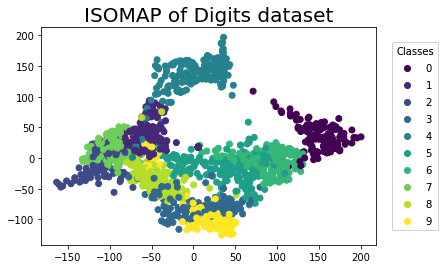

In [58]:
fig, ax = plt.subplots()
scatter = ax.scatter(Iisomap[:,0],Iisomap[:,1], c=target)
legend1 = ax.legend(*scatter.legend_elements(),loc="right", title="Classes", bbox_to_anchor=(1.2,0.5))
ax.add_artist(legend1)
plt.title('ISOMAP of Digits dataset', fontsize=20)

## **UMAP**

In [59]:
Iumap = umap.UMAP(n_components=2,n_neighbors=5).fit_transform(data)


Text(0.5, 1.0, 'UMAP of Digits dataset')

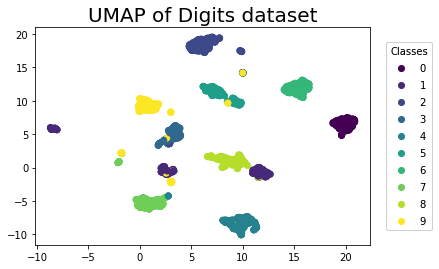

In [60]:
fig, ax = plt.subplots()
scatter = ax.scatter(Iumap[:,0],Iumap[:,1], c=target)
legend1 = ax.legend(*scatter.legend_elements(),loc="right", title="Classes", bbox_to_anchor=(1.2,0.5))
ax.add_artist(legend1)
plt.title('UMAP of Digits dataset', fontsize=20)